In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-12_04
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\corrected


In [3]:
file_s1 ='FGDOS_03F_LOW_B12_5_Apr_12_22-44-03_s1.csv'
file_s2 ='FGDOS_03F_LOW_B12_5_Apr_12_22-44-03_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s1 ,encoding='ISO-8859-1')
df_s2 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s2 ,encoding='ISO-8859-1')


FGDOS_03F_LOW_B12_5_Apr_12_22-44-03_s1.csv
FGDOS_03F_LOW_B12_5_Apr_12_22-44-03_s2.csv


In [6]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
#df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.0000,1,90,194755,70732,0,7.63,h,0,0
1,248.2288,1,90,195037,70716,0,7.63,h,0,0
2,510.8342,1,90,195281,70701,0,7.63,h,0,0
3,772.8488,1,90,195274,70716,0,7.63,h,0,0
4,1034.3112,1,90,195205,70701,0,7.63,h,0,0


In [7]:
df_s1.tail()
#df_s2.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
1339,450763.5518,1,89,191177,166915,0,7.63,l,0,0
1340,451026.1830,1,89,191276,166900,0,7.63,l,0,0
1341,451288.3627,1,89,191116,166908,0,7.63,l,0,0
1342,451550.0259,1,89,191131,166915,0,7.63,l,0,0
1343,451811.9957,1,89,191185,166915,0,7.63,l,0,0


In [8]:
# low sensitivity test at 120 MeV and very low dose rate
energy = 120
dose_rate_air = 0.001  # Gy/min
conv_factor = 0.906   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [9]:
s1[s1[:,3]<90000]

array([], shape=(0, 10), dtype=object)

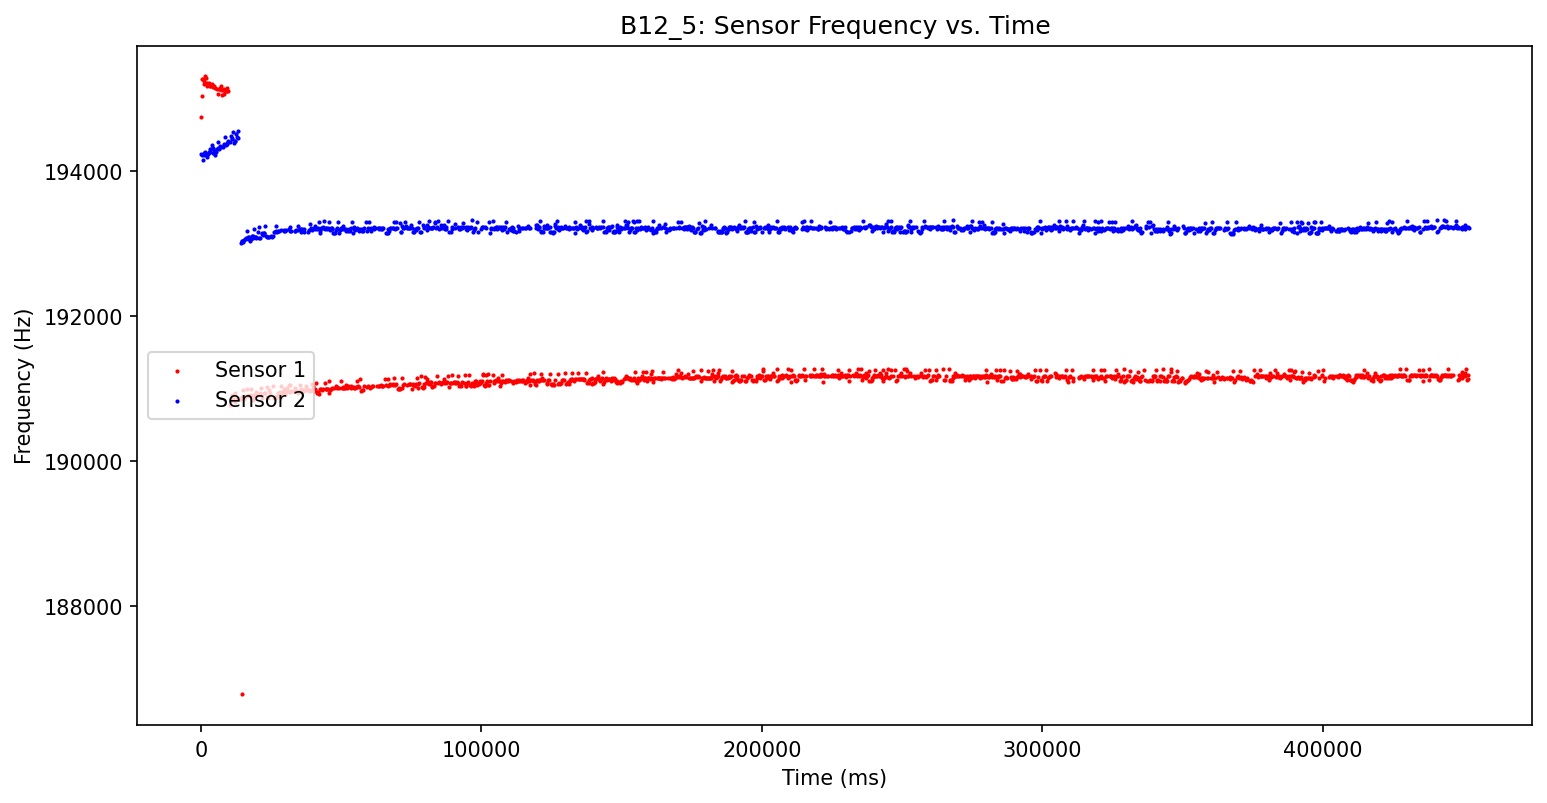

In [42]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(3.0e5,4.5e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(1.9e5,1.94e5)
plt.legend(loc="center left")
plt.title("B12_5: Sensor Frequency vs. Time")
plt.show()

In [30]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 1.0e5
ul_1 = 2.5e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

ll_2 = 2.5e5
ul_2 = 3.1e5
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [31]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.03481947527379148
intercept: [191440.32878874]
slope: [[-0.00093099]]
Sensor 1 sensitivity in kHz/Gy:  [[61.65475868]]


In [32]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.2823715479697607
intercept: [191051.59793844]
slope: [[0.00056666]]
Sensor 1 sensitivity in kHz/Gy:  [[37.52723858]]


In [33]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.012034092258039752
intercept: [191242.78507403]
slope: [[-0.00025442]]
Sensor 1 sensitivity in kHz/Gy:  [[16.84917936]]


In [34]:
# Sensor 2 irradiation intervals
ll_1 = 1.0e5
ul_1 = 2.5e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 1.9e5
ul_2 = 3.1e5
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [35]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.0828900953014241
intercept: [193357.96243863]
slope: [[-0.0004698]]
Sensor 2 sensitivity in kHz/Gy:  [[31.1124541]]


In [36]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 3.890228907310611e-05
intercept: [193219.16283807]
slope: [[-5.23998637e-06]]
Sensor 2 sensitivity in kHz/Gy:  [[0.34701897]]


In [38]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.0006158265108938688
intercept: [193223.75200092]
slope: [[-2.40766563e-05]]
Sensor 2 sensitivity in kHz/Gy:  [[1.59448055]]


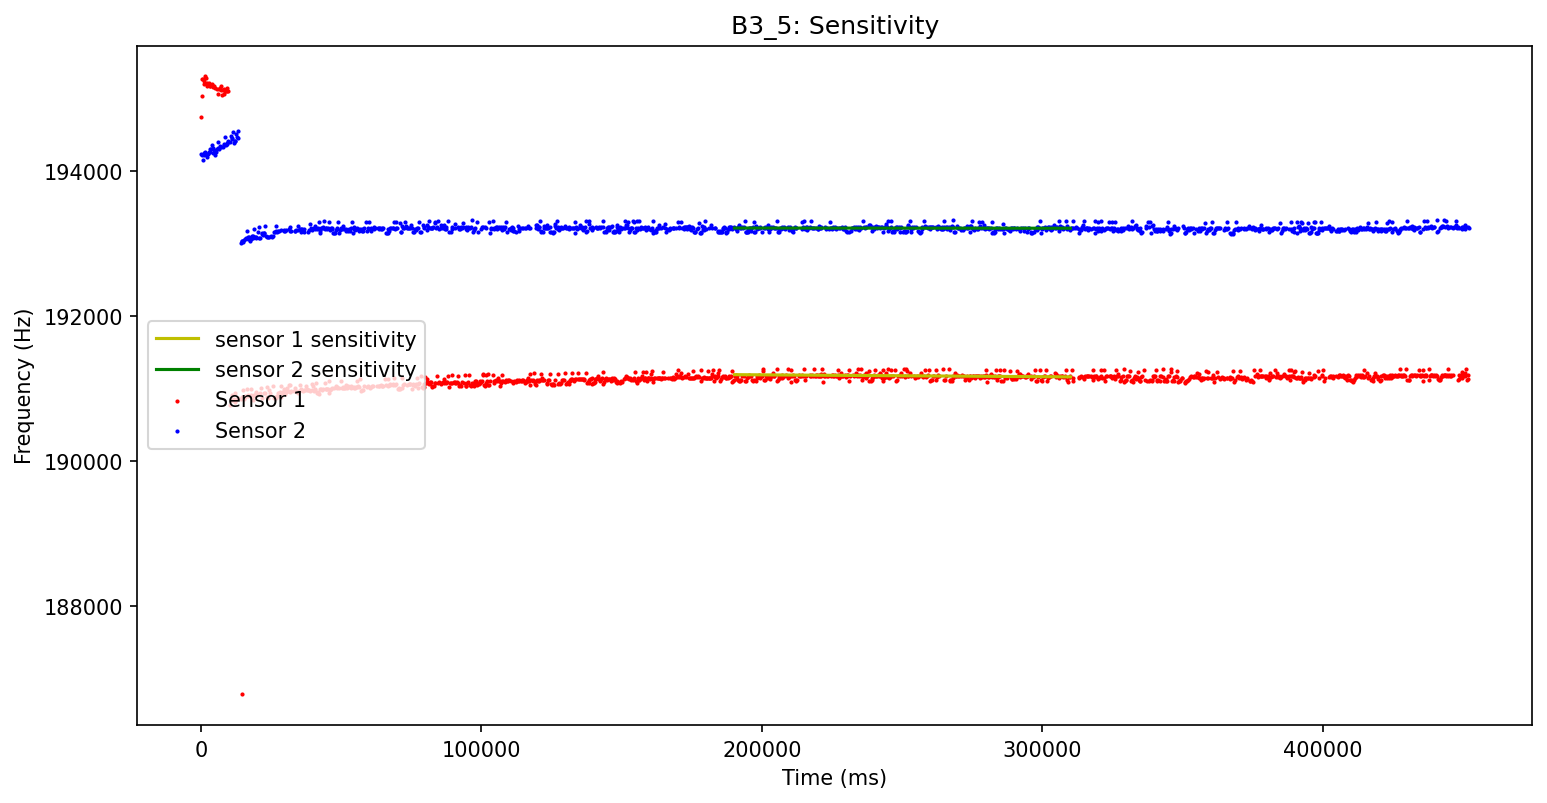

In [39]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')
#plt.ylim(0.3e5,1.2e5)

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_5: Sensitivity")
plt.show()

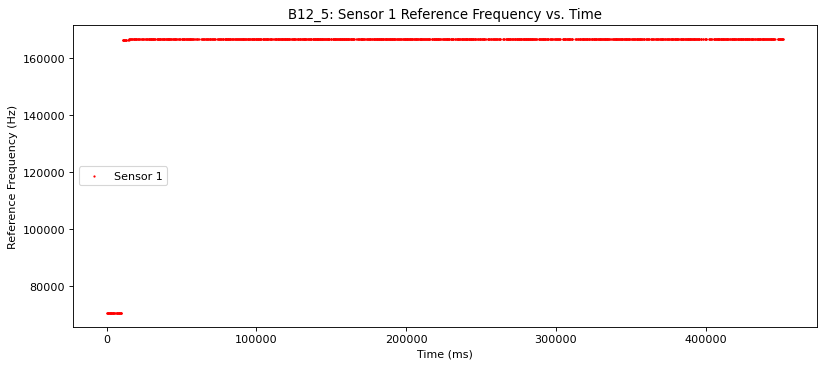

min:  70693
max:  166915
range:  96222
mean:  164334.54389880953
standard deviation:  15309.232935032447


In [43]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B12_5: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())
print('standard deviation: ',s1[:,4].std())

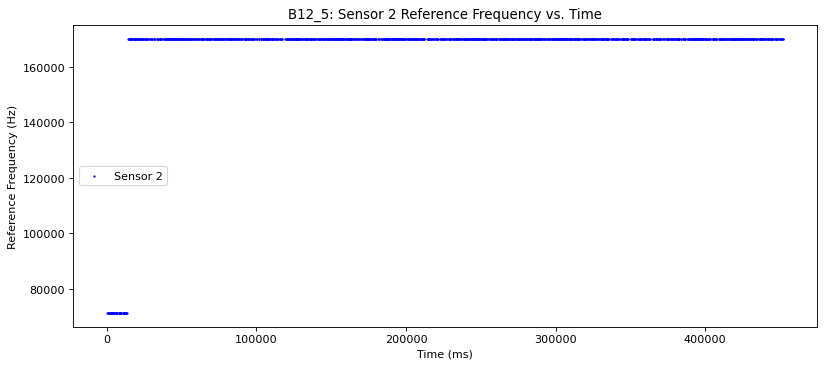

min:  71311
max:  170265
range:  98954
mean:  166689.01077752118
sigma:  18268.865662787113


In [44]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B12_5: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())
print('sigma: ',s2[:,4].std())

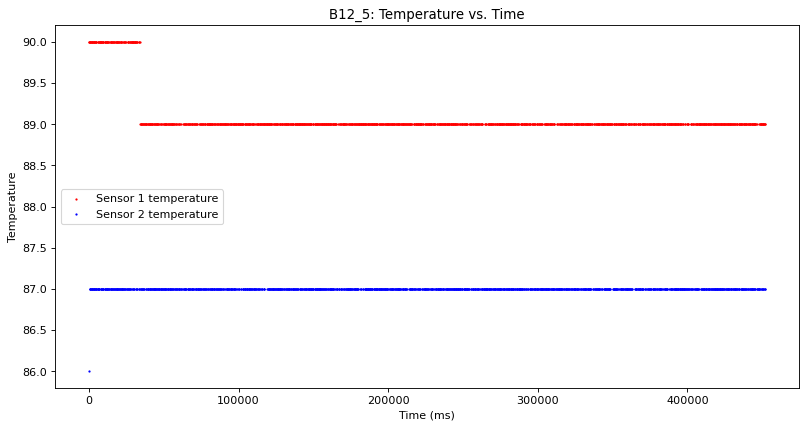

In [46]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (ms)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("B12_5: Temperature vs. Time")
plt.show()

In [45]:
s1[:,0].shape
        

(1344,)

[72306 72306 72306 ... 71828 71828 71829]


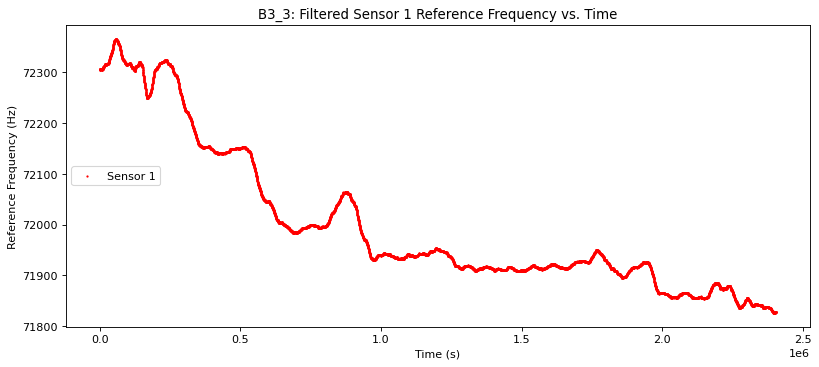

min:  71826
max:  72366
range:  540
mean:  72003.21778805208
sigma:  147.09387933990004


In [21]:
# Filtering of sensor & Reference frequencies
#Moving average filter with N point average

from scipy.ndimage.filters import uniform_filter1d

# Number of points used for averaging
N=100
y = uniform_filter1d(s1[:,4].astype(int), size=N)
print(y)

fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], y,s=1, c='r', label = 'Sensor 1')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_3: Filtered Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',y.min())
print('max: ',y.max())
print('range: ',y.max()-y.min())
print('mean: ',y.mean())
print('sigma: ',y.std())